## Imports

In [1]:
import time
from absl import app, flags, logging
from absl.flags import FLAGS
import cv2
import numpy as np
import tensorflow as tf
# from yolov3_tf2.models import YoloV3
# from yolov3_tf2.utils import draw_outputs
# from yolov3_tf2.dataset import transform_images
from yolov3_tf2.models import YoloV3Tiny
from yolov3_tf2.utils_for_tutorial import draw_outputs, transform_images
import matplotlib.pyplot as plt

# CLASSES_PATH = 'data/voc2012.names'
CLASSES_PATH = 'data/coco.names'
# WEIGHTS_PATH = 'checkpoints/yolov3-tiny_train_8.tf'
WEIGHTS_PATH = 'checkpoints/yolov3-tiny.tf'
IMAGE_SIZE = 416

## Load the model, the classes and the example image

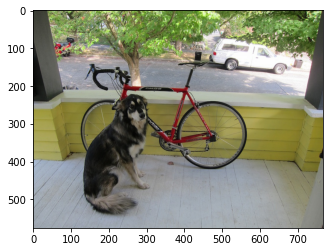

In [2]:
yolo_tiny = YoloV3Tiny()
yolo_tiny.load_weights(WEIGHTS_PATH)
class_names = [c.strip() for c in open(CLASSES_PATH).readlines()]

img = tf.image.decode_image(open('./data/dog_bike_car.jpg', 'rb').read(), channels=3)
plt.imshow(img)
plt.show() 

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

## Run inference and display result

In [3]:
output = yolo_tiny(input_img)
print(output, type(output), len(output),sep='\n\n')

(<tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[0.1615475 , 0.38147864, 0.49841225, 0.8973278 ],
        [0.6074033 , 0.14338502, 0.8942975 , 0.29843175],
        [0.6902115 , 0.1636725 , 0.82058984, 0.28008616],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.       

In [4]:
# 1. 박스 좌표 - 1차원: 전체 리스트 2차원: 박스 좌표들 3차원: 각 객체 위치 위치((x1,y1),(x2,y2))
# 2. 각 객체의 점수 - 1차원: 전체 리스트 2차원: 분류된 클래스에 속할 확률
# 3. 속한 클래스 - 1차원: 전체 리스트 2치원: 각 객체의 분류 클래스
# 4. 탐지된 객체 수
boxes, scores, classes, nums = yolo_tiny(input_img)

In [5]:
print(boxes,type(boxes),boxes.shape) # tf.Tensor, (1,100,4)
print(scores,type(scores),scores.shape) # tf.Tensor, (1,100)
print(classes,type(classes),classes.shape) # tf.Tensor, (1,100)
print(nums,type(nums),nums.shape) # tf.Tensor, (1,)

tf.Tensor(
[[[0.1615475  0.38147864 0.49841225 0.8973278 ]
  [0.6074033  0.14338502 0.8942975  0.29843175]
  [0.6902115  0.1636725  0.82058984 0.28008616]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.  

	dog, 0.826808750629425, [0.1615475  0.38147864 0.49841225 0.8973278 ]
	car, 0.7465109825134277, [0.6074033  0.14338502 0.8942975  0.29843175]
	truck, 0.5582234263420105, [0.6902115  0.1636725  0.82058984 0.28008616]


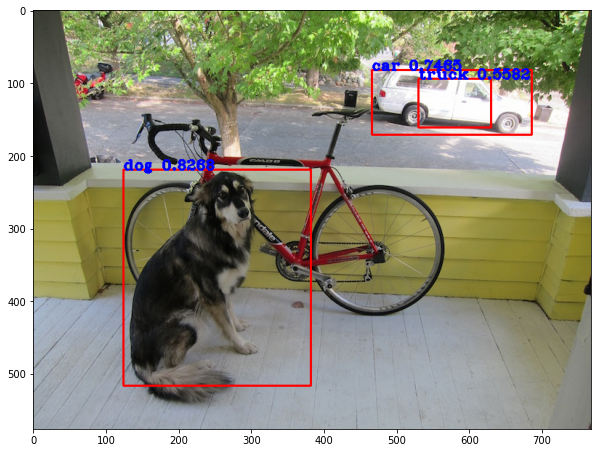

In [6]:
logging.info('detections:')
nums = tf.cast(nums, tf.int32)
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                       np.array(scores[0][i]),
                                       np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)